# Arbres de décision dans un contexte de régression

## World Hapiness

Le but de ce prrojet est de **prédire l'indice de bonheur** (variable `Score`) des différents pays du monde en fonction de diverses variables, telles que la production économique, le niveau de corruption perçu, l'espérance de vie, etc.

Pour plus de précision sur les data, voir les liens suivants:
- https://www.kaggle.com/unsdsn/world-happiness
- https://www.kaggle.com/unsdsn/world-happiness/2019.csv

## Exercice


### Load Data
1. Loadez les data.<br>
    `df = pd.read_csv("./data/WorldHapiness/2019.csv")`


### Data Analysis
2. Supprimez la variable `Overall rank`.


3. Visualisez la matrice des correlations ainsi que les "scatter plots" des correlations:<br> 
    `df.corr()`, `sns.heatmap(...)`, `sns.pairplot(...)`.


4. Visualisez la répatition de la variable `Score` (indice de bonheur à prédire):<br>
    `sns.distplot(df['Score'])`


5. Visualisez la valeur de `Score` pour les différents pays:<br>
```
plt.figure(figsize=(25, 10))
sns.barplot(x="Country or region", y="Score", data=df)
plt.xticks(rotation=90)
plt.show()
```


### Data Preprocessing and Splitting
6. Obtenez les **features** `X` et les **targets** `y` à partir de votre dataframe.<br>
    Les **features** corrrespondent à toutes les colonnes sauf `Score` et `Country or region`.<br>
    Les targets corrrespondent à la colonne `Score`.<br>
    Utilisez `df.drop(...)`.


7. Splittez les data en un **train set** et un **test set**.<br>
    Utilisez la fonction `train_test_split(...)`<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


8. Standardisez les features en utilisant un `StandardScaler`:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html<br>
    Que fait cet objet? À quoi cela sert-il de standardiser les donées?


### Model and Results
9. Instanciez et entraînez un **arbre de décision** `DecisionTreeRegressor` sur vos data:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn-tree-decisiontreeregressor<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions sur le test set


10. Calculez la **mean squared error**, la **mean absolute error** et le **R2 score** du modèle sur le test set.<br>
    Que représentent ces scores?<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
    
    
11. Représentez le graphe des targets en fonctions des prédictions sur le test set.<br>
    Qu'est-ce que vous pouvez déduire de l'aspect de ce graphe?
    
    
### Other Models
12. Entraînez également les modèles suivants de `scikit-learn`. Vous pouvez vous référer à la documentation de ces modèles pour plus d'information sur leurs utilisations.<br>
    1. `KNeighborsRegressor`
    2. `LinearRegression`
    3. `RandomForestRegressor`
    4. `GradientBoostingRegressor`
    5. `AdaBoostRegressor`


### Hyperparameter Tuning
13. Utilisez technique de **grid search** avec **cross validation** pour optimiser les hyperparamètres d'un random forest (prend du temps).<br>
    Faites varier les paramètres du modèle au sein des valeurs suivantes:<br>
    ```
    rf_params = {"max_depth": [3, 5, 8, None],
             "max_features": [3, 5, 10],
             "min_samples_split": [2, 5, 10],
             "min_samples_leaf": [1, 3, 5, 10],
             "bootstrap": [True, False],
             "n_estimators": [100, 500, 1000],
             "random_state": [42]}
    ```
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

## Libraries

In [1]:
import pandas as pd
import numpy as np
from keras.src.losses import MeanSquaredError

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [6]:
df = pd.read_csv("./data/WorldHapiness/2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Data Analysis

In [7]:
df.drop("Overall rank", axis=1, inplace=True)
df

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [10]:
df.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


<Axes: >

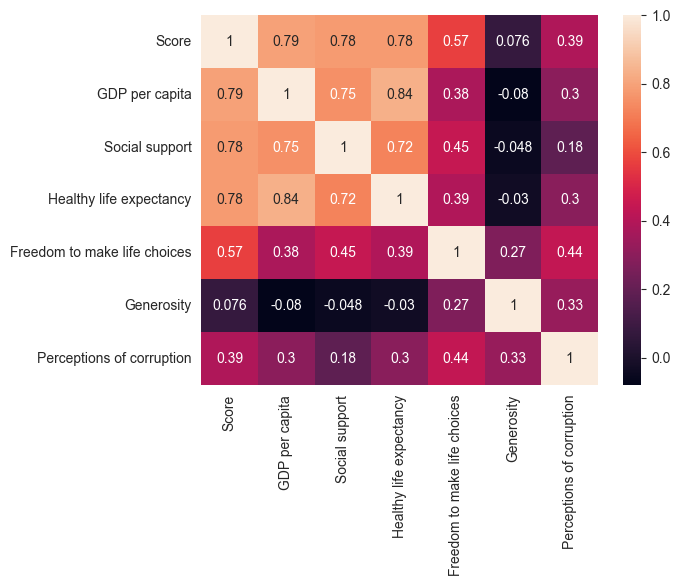

In [14]:
corr = df.drop(columns=["Country or region"]).corr()
sns.heatmap(corr, annot=True)

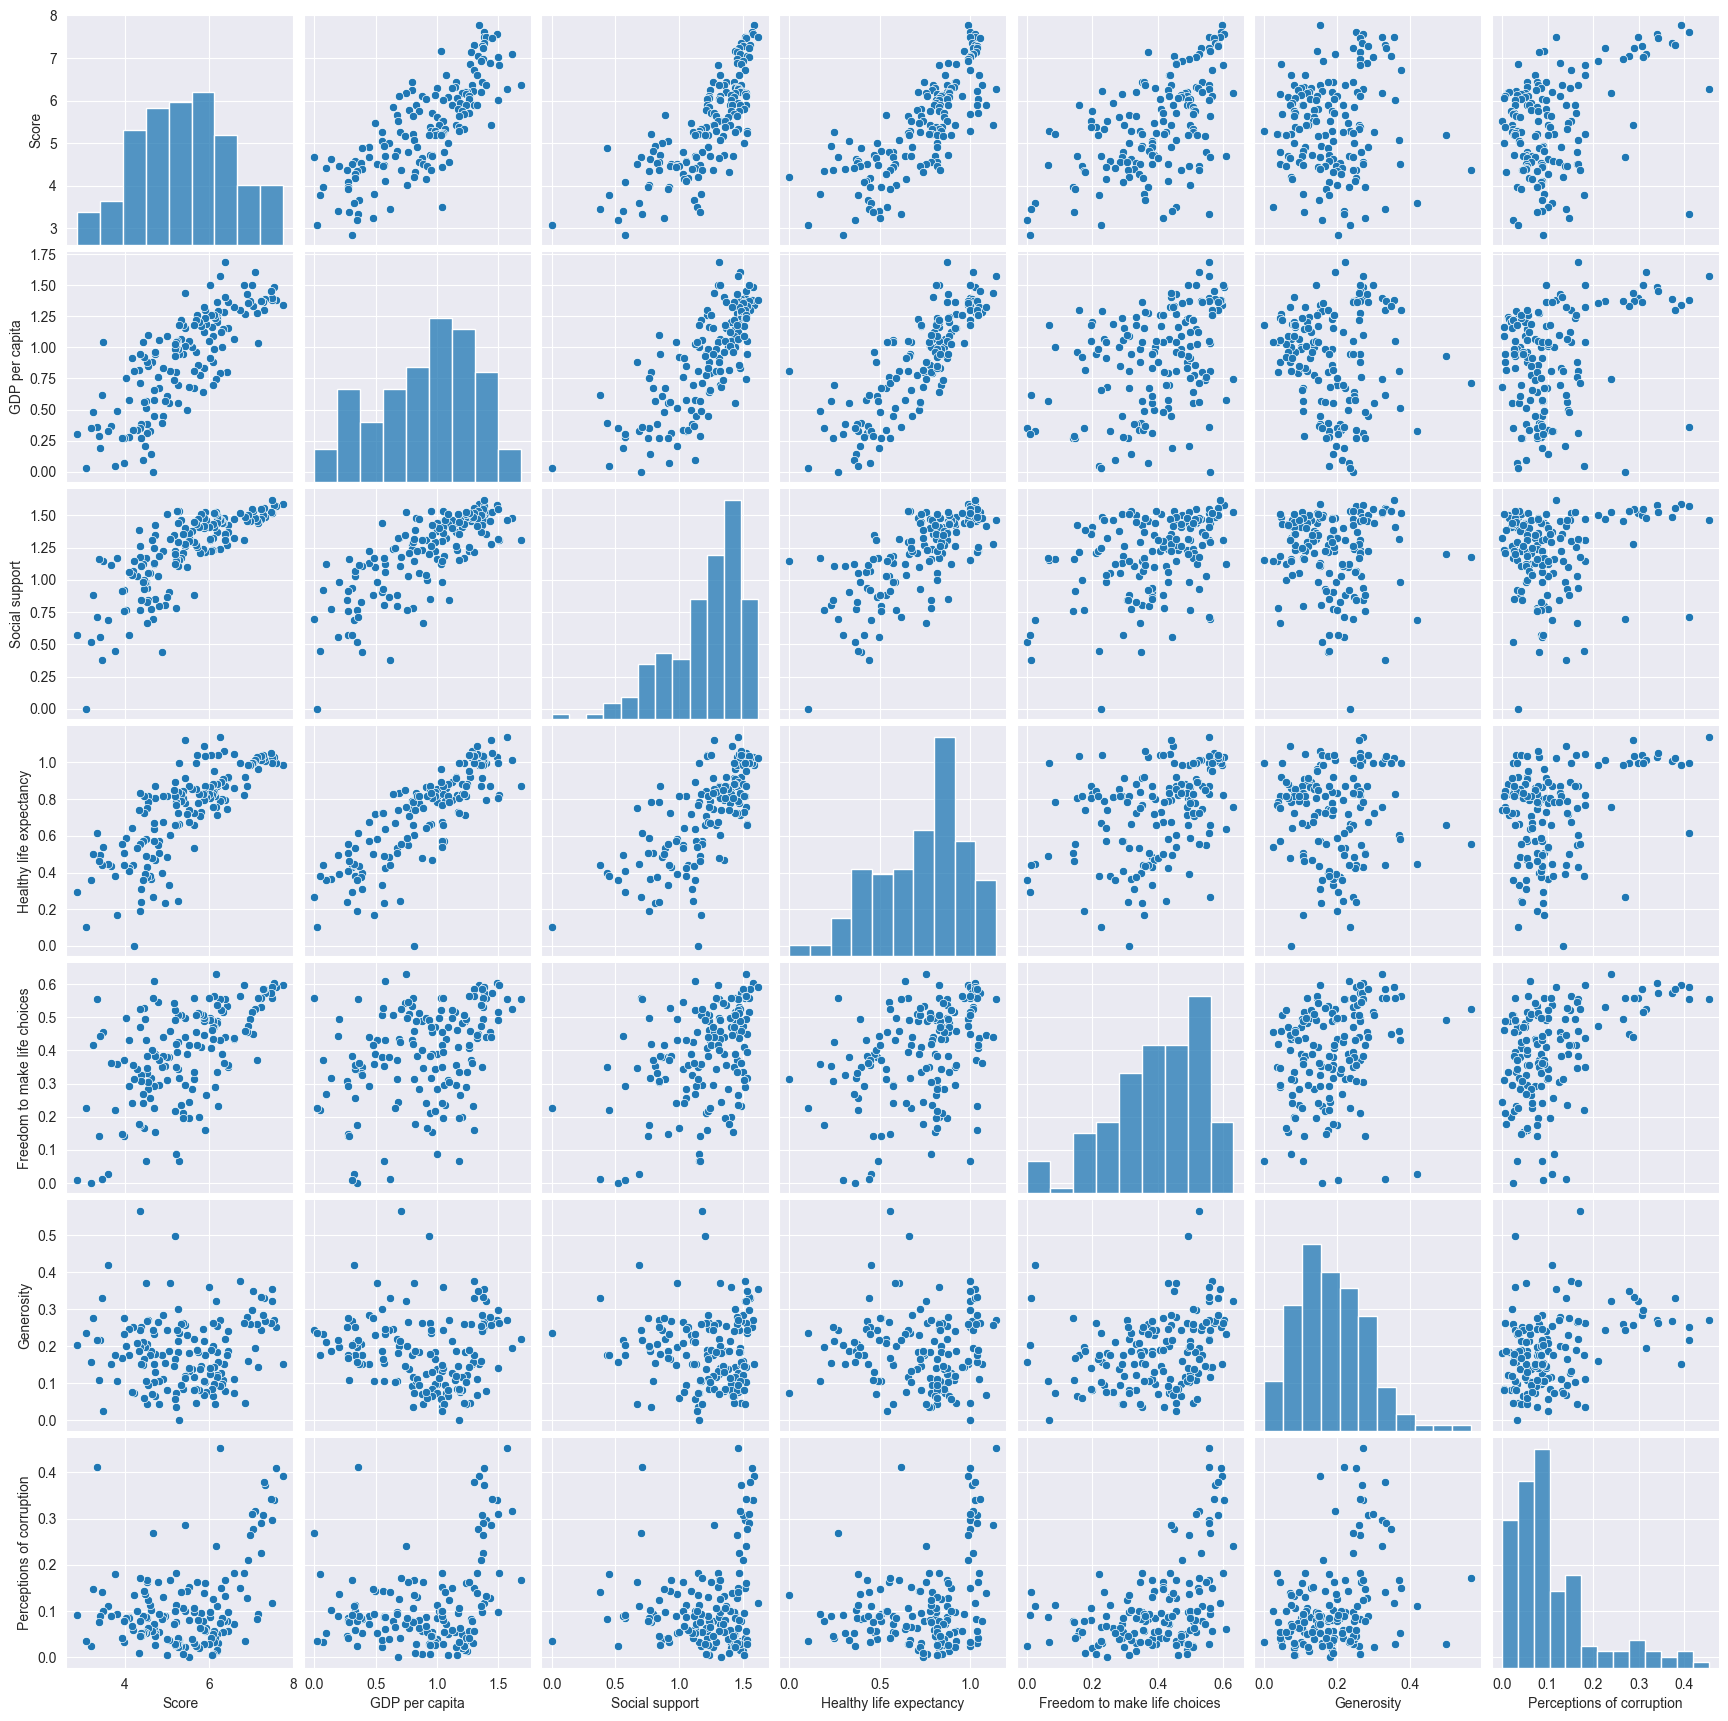

In [13]:
sns.pairplot(df)

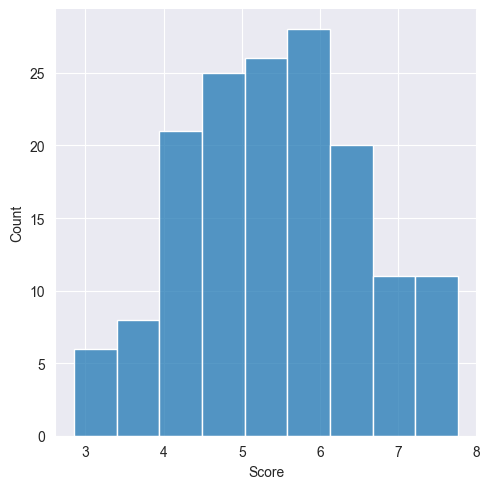

In [19]:
sns.displot(df['Score'])

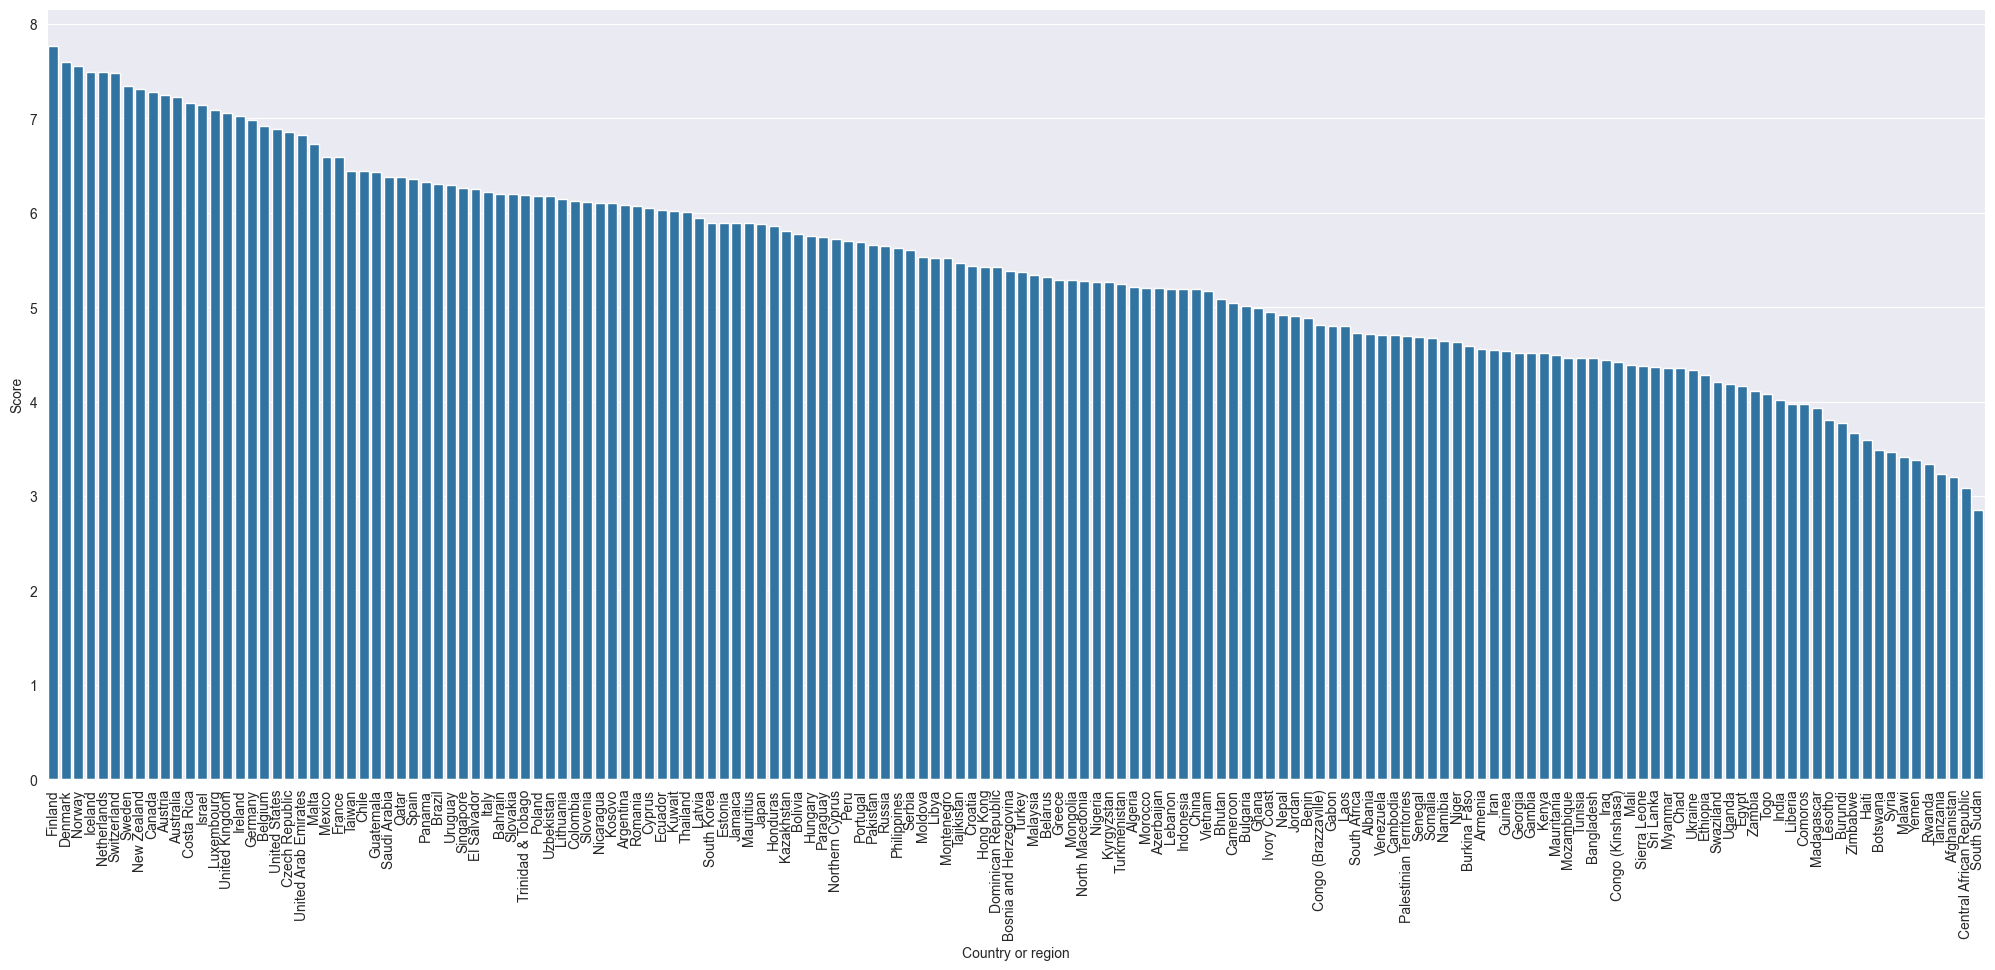

In [20]:
plt.figure(figsize=(25, 10))
sns.barplot(x="Country or region", y="Score", data=df)
plt.xticks(rotation=90)
plt.show()

## Data Preprocessing and Splitting

In [25]:
X = df.drop(columns=["Score", "Country or region"], axis=1)
Y = df["Score"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [28]:
scaler = StandardScaler() #toutes les valeurs normalisées entre 0 et 1
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model and Results

In [50]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
score = tree.score(X_test, y_test)
print(score)

0.45476589780641763


In [56]:
print("MSE : \t"+str(mean_squared_error(y_test, y_pred)))
print("MAE : \t"+str(mean_absolute_error(y_test, y_pred)))
print("R2 : \t"+str(r2_score(y_test, y_pred)))

MSE : 	0.5674378750000001
MAE : 	0.5346875
R2 : 	0.45476589780641763


Text(0.5, 1.0, 'Targets vs Predictions')

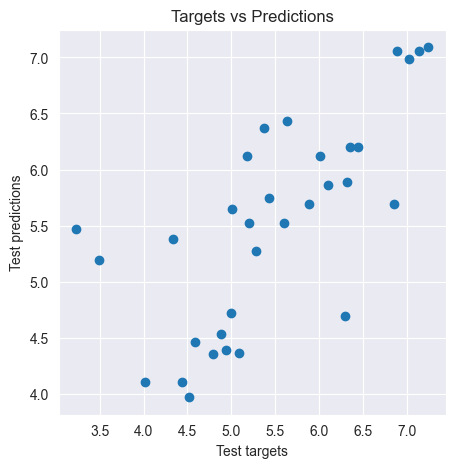

In [57]:
plt.figure(figsize=(5,5))

plt.scatter(y_test, y_pred)
plt.xlabel("Test targets")
plt.ylabel("Test predictions")
plt.title("Targets vs Predictions")
#il prédit pas ultra bien

## Other Models
### KNN, Linear Regression, Random Forest, Gradient Boosting, AdaBoost

In [61]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print("KNN Score:\t\t\t\t\t", knn_score)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print("Linear Regression Score:\t", lr_score)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print("Random Forest Score:\t\t", rf_score)

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_score = gb.score(X_test, y_test)
print("Gradient Boosting Score:\t", gb_score)

# AdaBoost
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_score = ada.score(X_test, y_test)
print("AdaBoost Score:\t\t\t\t", ada_score)

KNN Score:					 0.5687029874773399
Linear Regression Score:	 0.6017537913445683
Random Forest Score:		 0.6298800898942035
Gradient Boosting Score:	 0.6062861094024219
AdaBoost Score:				 0.5924076593092995


## Hyperparameter Tuning